Olá Rocketmat!

No desafio 1, foi solicitado realizar uma análise do dataset e da relação entre suas informações. 

O objetivo era descobrir quais fatores eram criticos para que um funcionário saisse da empresa (left_Company). 

Comecei importando as bibliotecas que iria usar nesta analise.


In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import *
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier


Em seguida, criei um Dataframe (df) com o csv fornecido no kaggle contendo todas as informações.

In [195]:
df = pd.read_csv('https://raw.githubusercontent.com/vivianfreitasmelo/rocketmat/master/HR_Engagement_Sat_Sales_UpdatedV4.0.csv')
df.head()

,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,1,BRADDY,Operations,US,VP,NaN,0,1.0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,NaN,0,sales,low,M,5,4,3,1,1,1,1,2,1,NaN,1.0,2,4,2,2,2,2,2,2,1,5,1841,61,9
1,2,BORST,Sales,UK,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,NaN,0,accounting,low,F,58,3,3,4,3,2,1,2,1,0.0,NaN,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,3,BIRDWELL,Finance,France,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,NaN,0,product_mng,medium,F,42,2,4,1,3,1,1,2,2,1.0,NaN,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,4,BENT,Human Resources,China,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,NaN,0,product_mng,high,M,37,3,1,4,5,2,1,2,1,NaN,1.0,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,5,BAZAN,IT,Korea,Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,NaN,0,sales,low,F,6,4,5,4,5,1,1,2,1,1.0,NaN,1,4,1,5,3,5,1,2,5,4,3149,80,10


In [196]:
df.describe()

,ID,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
count,14999.000000,21.0,14999.000000,480.0,14999.0,14999.0,14999.0,14999.000000,14871.0,14871.000000,14871.000000,14871.000000,14871.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,1713.0,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,7596.000000,4865.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,1.0,0.499833,1.0,3.0,6.0,6.0,0.617321,3.0,2.731962,3.731962,2.731962,3.943649,2.839723,4.367691,3.367691,3.761784,3.973598,4.047670,4.285752,3.761917,3.523835,2.523835,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,5.0,0.021268,18.553904,3.001867,3.014468,3.005800,3.002867,2.141343,2.116274,1.998400,1.990066,0.707741,0.908530,2.156010,2.987199,2.144010,2.999067,2.987066,2.979532,1.676245,2.998533,3.005200,3.016934,3406.693246,77.967198,6.399360
std,4329.982679,0.0,0.500017,0.0,0.0,0.0,0.0,0.193841,0.0,0.681369,0.681369,0.681369,1.244511,0.776054,0.929979,0.929979,0.580834,1.367462,1.703696,1.277772,0.425924,0.851848,0.851848,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.0,0.144281,18.987335,1.413788,1.417319,1.418791,1.413008,1.023277,1.010454,0.865389,0.856232,0.454831,0.288306,1.032378,1.416793,1.030439,1.406128,1.412314,1.412579,0.865230,1.410058,1.410191,1.412225,1755.742272,7.252848,2.588091
min,1.000000,1.0,0.000000,1.0,3.0,6.0,6.0,0.400000,3.0,1.000000,2.000000,1.000000,1.000000,2.000000,3.000000,2.000000,3.000000,2.000000,1.000000,2.000000,3.000000,2.000000,1.000000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,5.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000.000000,60.000000,1.000000
25%,3750.500000,1.0,0.000000,1.0,3.0,6.0,6.0,0.400000,3.0,3.000000,4.000000,3.000000,4.000000,2.000000,3.000000,2.000000,3.000000,2.000000,5.000000,5.000000,4.000000,4.000000,3.000000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,5.0,0.000000,5.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1704.500000,75.000000,5.000000
50%,7500.000000,1.0,0.000000,1.0,3.0,6.0,6.0,0.800000,3.0,3.000000,4.000000,3.000000,4.000000,3.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,3.000000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,5.0,0.000000,9.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3376.000000,78.000000,7.000000
75%,11249.500000,1.0,1.000000,1.0,3.0,6.0,6



Solicitei um describe para identificar dados que justificassem separá-los do df original para uma analise mais eficiente.

Como criterio, exclui as colunas que não variavam (ex.: Talent_Level, Validated_level, Trending Perf). 

'Women_Leave' e 'Men_Leave' tambem foram removidos por possuirem muitos NA.

Escolhi os seguintes labels parar realizar a primeira analise, criando o Dataframe df1 : 
'Percent_Remote',
'last_evaluation',
'number_project',
'average_montly_hours',
'time_spend_company',
'Work_accident',
'left_Company',
'promotion_last_5years',
'salary'e
'Gender'




In [197]:
df1 = df.drop(['ID', 'Department', 'GEO', 'Role',  'Rising_Star',
 'Will_Relocate','Critical','CSR Factor','Name','Trending Perf','Talent_Level','Validated_Talent_Level','LinkedIn_Hits', 'EMP_Sat_OnPrem_1','EMP_Sat_OnPrem_2','EMP_Sat_OnPrem_3','EMP_Sat_OnPrem_4','EMP_Sat_OnPrem_5','EMP_Sat_Remote_1','EMP_Sat_Remote_2','EMP_Sat_Remote_3','EMP_Sat_Remote_4','EMP_Sat_Remote_5','EMP_Engagement_1','EMP_Engagement_2','EMP_Engagement_3','EMP_Engagement_4','EMP_Engagement_5','Emp_Work_Status2','Emp_Work_Status_3','Emp_Work_Status_4','Emp_Work_Status_5','Emp_Identity','Emp_Role','Emp_Position','Emp_Title','Women_Leave','Men_Leave','Emp_Competitive_1','Emp_Competitive_2','Emp_Competitive_3','Emp_Competitive_4','Emp_Competitive_5','Emp_Collaborative_1','Emp_Collaborative_2','Emp_Collaborative_3','Emp_Collaborative_4','Emp_Collaborative_5',  'Sensor_StepCount',
 'Sensor_Heartbeat(Average/Min)',
 'Sensor_Proximity(1-highest/10-lowest)', 'sales'], axis =1)
df1

,Percent_Remote,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,promotion_last_5years,salary,Gender
0,0.4,0.36,3,168,3,1,0,0,low,M
1,0.4,0.36,5,159,2,0,0,0,low,F
2,0.4,0.36,2,282,3,0,0,0,medium,F
3,0.4,0.36,4,278,4,1,0,0,high,M
4,0.4,0.36,6,256,5,0,0,0,low,F
...,...,...,...,...,...,...,...,...,...,...
14994,1.0,1.00,4,252,5,0,1,0,medium,F
14995,1.0,1.00,4,232,5,0,1,0,medium,F
14996,1.0,1.00,5,242,5,0,1,0,low,F
14997,1.0,1.00,5,223,6,0,1,0,medium,M


Solicitei a informação dos tipos de colunas para mantê-los em um padrão numérico para estudar suas correlações.

In [198]:
df1.dtypes

Percent_Remote           float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left_Company               int64
promotion_last_5years      int64
salary                    object
Gender                    object
dtype: object

In [199]:
df1

,Percent_Remote,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,promotion_last_5years,salary,Gender
0,0.4,0.36,3,168,3,1,0,0,low,M
1,0.4,0.36,5,159,2,0,0,0,low,F
2,0.4,0.36,2,282,3,0,0,0,medium,F
3,0.4,0.36,4,278,4,1,0,0,high,M
4,0.4,0.36,6,256,5,0,0,0,low,F
...,...,...,...,...,...,...,...,...,...,...
14994,1.0,1.00,4,252,5,0,1,0,medium,F
14995,1.0,1.00,4,232,5,0,1,0,medium,F
14996,1.0,1.00,5,242,5,0,1,0,low,F
14997,1.0,1.00,5,223,6,0,1,0,medium,M


Converti as colunas 'salary' e 'Gender' para numeros type int64

In [200]:
salario = {'high': 3,
          'medium' : 2,
          'low': 1}

df1['salary'] = df1['salary'].map(salario)

In [201]:
Genero = {'M': 1,
          'F' : 2,}

df1['Gender'] = df1['Gender'].map(Genero)
df1

,Percent_Remote,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,promotion_last_5years,salary,Gender
0,0.4,0.36,3,168,3,1,0,0,1,1
1,0.4,0.36,5,159,2,0,0,0,1,2
2,0.4,0.36,2,282,3,0,0,0,2,2
3,0.4,0.36,4,278,4,1,0,0,3,1
4,0.4,0.36,6,256,5,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...
14994,1.0,1.00,4,252,5,0,1,0,2,2
14995,1.0,1.00,4,232,5,0,1,0,2,2
14996,1.0,1.00,5,242,5,0,1,0,1,2
14997,1.0,1.00,5,223,6,0,1,0,2,1


In [202]:
df1.dtypes

Percent_Remote           float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left_Company               int64
promotion_last_5years      int64
salary                     int64
Gender                     int64
dtype: object

Normalizei os dados pela StandardScaler

In [219]:
std = StandardScaler()
pd.DataFrame(
    std.fit_transform(df1),
    columns=df1.columns
).head()

,Percent_Remote,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,promotion_last_5years,salary,Gender
0,-1.121168,-2.080478,-0.651538,-0.661782,-0.341235,2.432112,-0.558997,-0.147412,-0.933368,-1.012951
1,-1.121168,-2.080478,0.971113,-0.841993,-1.026126,-0.411165,-0.558997,-0.147412,-0.933368,0.987214
2,-1.121168,-2.080478,-1.462863,1.620892,-0.341235,-0.411165,-0.558997,-0.147412,0.636092,0.987214
3,-1.121168,-2.080478,0.159788,1.540798,0.343655,2.432112,-0.558997,-0.147412,2.205553,-1.012951
4,-1.121168,-2.080478,1.782438,1.100282,1.028546,-0.411165,-0.558997,-0.147412,-0.933368,0.987214


In [220]:

df1_std = pd.DataFrame(
    StandardScaler().fit_transform(df1.drop(['left_Company'], axis=1)),
    columns=df1.columns.drop(['left_Company'])
)

df1_std['left_Company'] = df1['left_Company']

df1_std.head()

,Percent_Remote,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Gender,left_Company
0,-1.121168,-2.080478,-0.651538,-0.661782,-0.341235,2.432112,-0.147412,-0.933368,-1.012951,0
1,-1.121168,-2.080478,0.971113,-0.841993,-1.026126,-0.411165,-0.147412,-0.933368,0.987214,0
2,-1.121168,-2.080478,-1.462863,1.620892,-0.341235,-0.411165,-0.147412,0.636092,0.987214,0
3,-1.121168,-2.080478,0.159788,1.540798,0.343655,2.432112,-0.147412,2.205553,-1.012951,0
4,-1.121168,-2.080478,1.782438,1.100282,1.028546,-0.411165,-0.147412,-0.933368,0.987214,0


Criei uma matriz de corelação para avaliar o Dataframe df1_std:

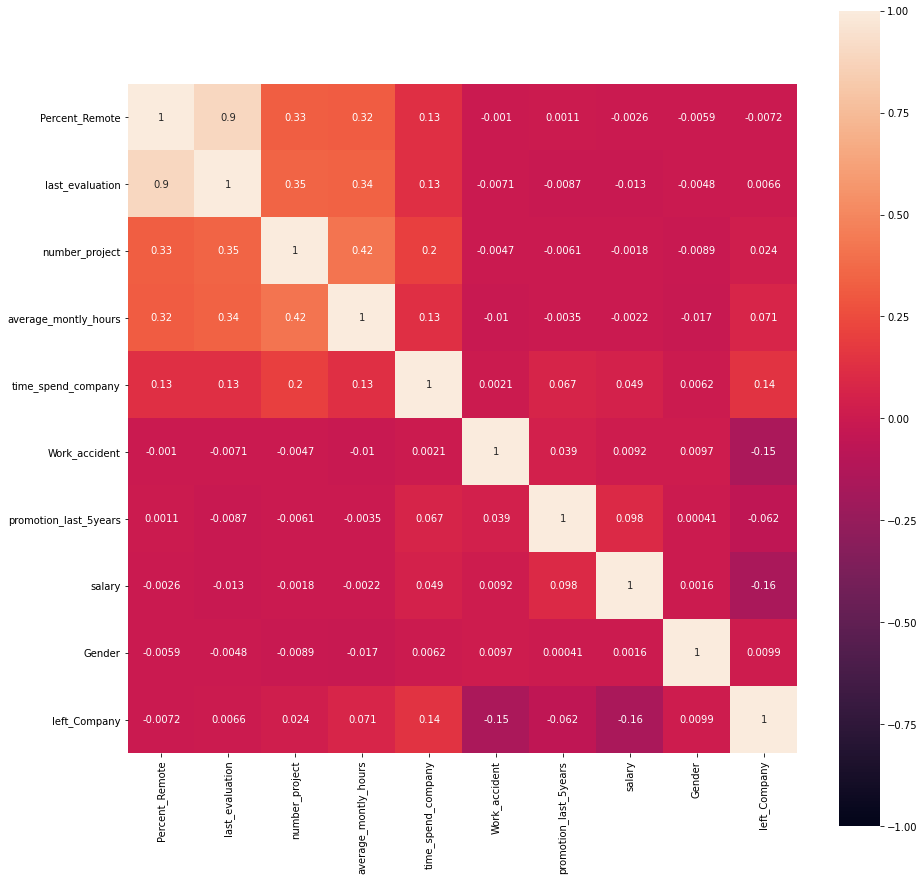

In [212]:
corr_mat = df1_std.corr()

f, ax = plt.subplots(figsize=(15, 15))

sns.heatmap(
    corr_mat, 
    annot=True, 
    square=True, 
    vmax=1, 
    vmin=-1
)

Através da matriz de correlação, pude observar a alta relação entre 'Percent_Remote' e 'last_evaluation'. Eles apresentam uma correlação positiva.


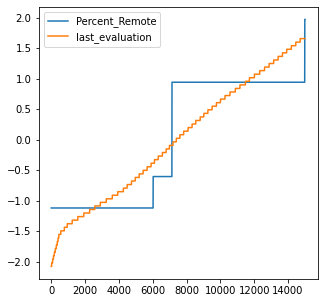

In [222]:
df1_std[['Percent_Remote', 'last_evaluation']].plot(figsize=(5,5))

Analisando essa relação, identifiquei áreas no gráfico onde pessoas tendem a sair mais da empresa - as que tem alta avaliação e alto percentual remoto tem maior tendencia de sair da empresa. 

Text(0.5, 1.0, 'Relação entre average_montly_hours e last_evaluation')

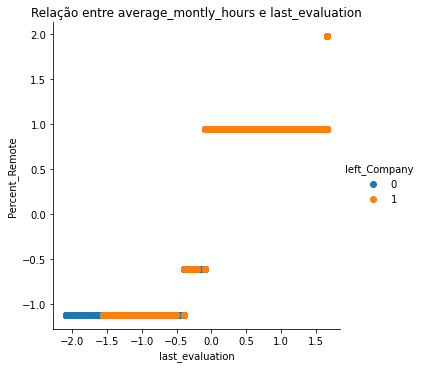

In [224]:
sns.FacetGrid(
    df1_std, 
    hue='left_Company',
    height=5
).map(
    plt.scatter, 'last_evaluation', 'Percent_Remote'
).add_legend()

plt.title('Relação entre average_montly_hours e last_evaluation')

Analisando essa relação, identifiquei áreas no gráfico onde pessoas tendem a sair mais da empresa - as que tem alta avaliação e média mensal de horas alta tem maior tendencia de sair da empresa. 

Text(0.5, 1.0, 'Relação entre average_montly_hours e last_evaluation')

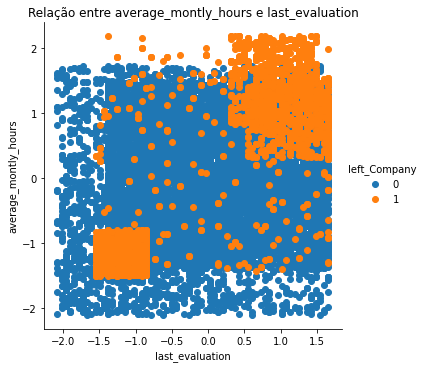

In [225]:
sns.FacetGrid(
    df1_std, 
    hue='left_Company',
    height=5
).map(
    plt.scatter, 'last_evaluation', 'average_montly_hours'
).add_legend()

plt.title('Relação entre average_montly_hours e last_evaluation')

Solicitei uma Modelo de árvores (RandomForestClassifier) para medir a importaria de cada feature na influência sobre deixar a empresa, que é no caso o label escolhido.

In [229]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=50,
    max_depth=5
)

clf.fit(
    df1_std.drop(['left_Company'], axis=1),
    df1_std['left_Company']
)

clf.feature_importances_

array([4.24238460e-02, 1.47831348e-01, 3.58077349e-01, 2.14263899e-01,
       2.19667886e-01, 1.19714795e-02, 7.53924247e-04, 4.84311199e-03,
       1.67155997e-04])

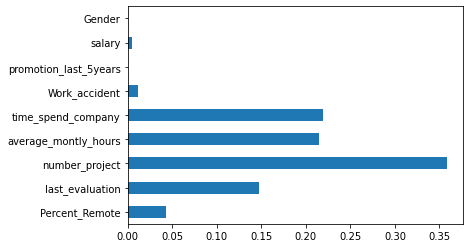

In [230]:
feat_importances = pd.Series(
    clf.feature_importances_, 
    index=df1.drop(['left_Company'], axis=1).columns
)
feat_importances.plot(kind='barh');

Text(0.5, 1.0, 'Relação entre last_evaluation e number_project')

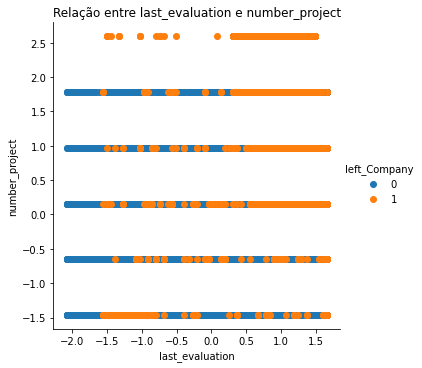

In [228]:
sns.FacetGrid(
    df1_std, 
    hue='left_Company',
    height=5
).map(
    plt.scatter, 'last_evaluation', 'number_project'
).add_legend()

plt.title('Relação entre last_evaluation e number_project')

Pelo grafico acima, observa-se que o numero de projetos influencia altamente que as pessoas saiam da empresa.

Dentro dos features de df1_std, o mais relevante para determinar se o funcionario sairá da empresa ou não é o seu numero de projetos. Em seguida, o numero da média de horas mensais trabalhadas e o tempo total passado na empresa. 

Text(0.5, 1.0, 'Relação entre salary e average_montly_hours')

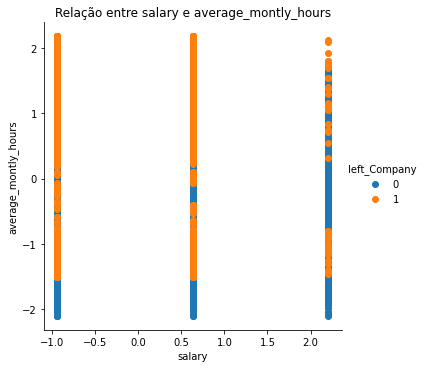

In [254]:
sns.FacetGrid( df1_std, hue='left_Company',height=5). map (plt.scatter, 'salary', 'average_montly_hours').add_legend()

plt.title('Relação entre salary e average_montly_hours')

A partir daqui, passei a relacionar treinos e testes e observar a acurácia de modelos de machine learning.

Para treinar o modelo, separei X e y para preparar os dados para o treinamento e previsão

In [255]:
X = df1_std.drop(['left_Company'], axis=1)
y = df1_std['left_Company']

In [256]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [258]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.33, 
    random_state=1
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(10049, 9) (10049,)
(4950, 9) (4950,)


In [237]:
model = DecisionTreeClassifier(
    max_depth=4,
    criterion='entropy',
    random_state=1
)

model.fit(
    X_train, y_train
)

y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [238]:
# Avalia com a métrica de acurácia (não funciona bem para targets desbalanceados)
metrics.accuracy_score(
    y_test, # Valor esperado
    y_pred # Valor previsto
)

0.9397979797979797

Atraves do modelo DecisionTreeClassifier, a acurácia ficou em 0.9397979797979797.

In [240]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    model,
    X,
    y, 
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

print('Score de cada fold', scores)
print('Acurácia média:', np.mean(scores))
print('Desvio padrão:', np.std(scores))

Score de cada fold [0.2408     0.7974     0.25025005]
Acurácia média: 0.429483350003334
Desvio padrão: 0.2601849622478527


*Questao* bonus

- As analises dos graficos apresentados e o numero de horas trabalhadas estão fortemente ligados a evasão dos funcionários.
 Uma proposta de melhoria seria distribuir melhor a quantidade de projetos entre os outros funcionários, além de equiparar as horas trabalhadas desses funcionários, pois foi verificados que ter salario alto reduz as chances do funcionário sair da empresa ( exceção aos funcionários com alto salário mas last_evaluation mediana) 

- Pessoas com maior porcentagem de trabalho em casa (Percentage_Remoto) tem maior avaliação (last_evaluation). Uma melhoria poderia ser aumentar o percentual de pessoas trabalhando remotamente para melhorar a qualidade da avaliação do funcionário.

- Pessoas com avaliacao abaixo da média  e com baixa porcentagem de trabalho remoto também saem da empresa.  

- Mesmo os funcionários com altos salários, tendo muitos projetos e alta carga horaria, se desligam da empresa. 










